<a href="https://colab.research.google.com/github/FahmidaAkterShimu/Final-Project-using-NLP/blob/main/Hate_Speech_Detection_using_LSTM06.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Hate Speech Detection using LSTM

In [1]:
# Importing libraries
import pandas as pd
import spacy
import numpy as np
import pickle
from tensorflow.keras.preprocessing.text import one_hot
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
import tensorflow as tf
from tensorflow import keras
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('/content/labeled_data.csv')

In [223]:
df.shape

(24783, 7)

- 0 - hate speech
- 1 - offensive language
- 2 - neither

In [60]:
df.head()

,Unnamed: 0,count,hate_speech,offensive_language,neither,class,tweet
0,0,3,0,0,3,2,!!! RT @mayasolovely: As a woman you shouldn't...
1,1,3,0,3,0,1,!!!!! RT @mleew17: boy dats cold...tyga dwn ba...
2,2,3,0,3,0,1,!!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...
3,3,3,0,2,1,1,!!!!!!!!! RT @C_G_Anderson: @viva_based she lo...
4,4,6,0,6,0,1,!!!!!!!!!!!!! RT @ShenikaRoberts: The shit you...


In [62]:
df.columns

Index(['Unnamed: 0', 'count', 'hate_speech', 'offensive_language', 'neither',
       'class', 'tweet'],
      dtype='object')

In [3]:
# 1. DELETING UNWANTED COLUMNS
df.drop(columns = ['Unnamed: 0',	'count',	'hate_speech',	'offensive_language',	'neither'],
        inplace = True)

In [64]:
df.head()

,class,tweet
0,2,!!! RT @mayasolovely: As a woman you shouldn't...
1,1,!!!!! RT @mleew17: boy dats cold...tyga dwn ba...
2,1,!!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...
3,1,!!!!!!!!! RT @C_G_Anderson: @viva_based she lo...
4,1,!!!!!!!!!!!!! RT @ShenikaRoberts: The shit you...


In [4]:
# 2. CHECKING FOR NULL VALUES
df.isna().sum()

,0
class,0
tweet,0


In [66]:
df['tweet'].iloc[0]

"!!! RT @mayasolovely: As a woman you shouldn't complain about cleaning up your house. &amp; as a man you should always take the trash out..."

In [67]:
df['tweet'].iloc[100]

'"@ClicquotSuave: LMAOOOOOOOOOOO this nigga @Krillz_Nuh_Care http://t.co/AAnpSUjmYI" &lt;bitch want likes for some depressing shit..foh'

In [11]:
df['tweet'].iloc[1000]

'&#128514;&#128514;&#128514;&#128514;&#128514;&#128514;&#128514;"@betysweetcocker: That pussy is just....&#128561; imma assume she just had a baby like..the day before"'

In [5]:
# 3. REPLACING SYMBOLS AND NUMBERS FROM TEXT
df['processed_tweet'] = df['tweet'].str.replace(r'[^a-zA-Z]', ' ', regex = True)

In [69]:
df.head()

,class,tweet,processed_tweet
0,2,!!! RT @mayasolovely: As a woman you shouldn't...,RT mayasolovely As a woman you shouldn t...
1,1,!!!!! RT @mleew17: boy dats cold...tyga dwn ba...,RT mleew boy dats cold tyga dwn ba...
2,1,!!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...,RT UrKindOfBrand Dawg RT sbaby...
3,1,!!!!!!!!! RT @C_G_Anderson: @viva_based she lo...,RT C G Anderson viva based she lo...
4,1,!!!!!!!!!!!!! RT @ShenikaRoberts: The shit you...,RT ShenikaRoberts The shit you...


In [70]:
df['processed_tweet'].iloc[0]

'    RT  mayasolovely  As a woman you shouldn t complain about cleaning up your house   amp  as a man you should always take the trash out   '

In [15]:
df['processed_tweet'].iloc[1000]

'                                                                 betysweetcocker  That pussy is just              imma assume she just had a baby like  the day before '

In [6]:
# 4. REPLACING MULTIPLE WHITESPACE CHARACTERS WITH SINGLE ONE
df['processed_tweet_2'] = df['processed_tweet'].str.replace(r'[\s]+', ' ', regex = True)

In [72]:
df.head()

,class,tweet,processed_tweet,processed_tweet_2
0,2,!!! RT @mayasolovely: As a woman you shouldn't...,RT mayasolovely As a woman you shouldn t...,RT mayasolovely As a woman you shouldn t comp...
1,1,!!!!! RT @mleew17: boy dats cold...tyga dwn ba...,RT mleew boy dats cold tyga dwn ba...,RT mleew boy dats cold tyga dwn bad for cuffi...
2,1,!!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...,RT UrKindOfBrand Dawg RT sbaby...,RT UrKindOfBrand Dawg RT sbaby life You ever ...
3,1,!!!!!!!!! RT @C_G_Anderson: @viva_based she lo...,RT C G Anderson viva based she lo...,RT C G Anderson viva based she look like a tr...
4,1,!!!!!!!!!!!!! RT @ShenikaRoberts: The shit you...,RT ShenikaRoberts The shit you...,RT ShenikaRoberts The shit you hear about me ...


In [73]:
df['processed_tweet_2'].iloc[0]

' RT mayasolovely As a woman you shouldn t complain about cleaning up your house amp as a man you should always take the trash out '

In [19]:
df['processed_tweet_2'].iloc[1000]

' betysweetcocker That pussy is just imma assume she just had a baby like the day before '

In [74]:
df.head()

,class,tweet,processed_tweet,processed_tweet_2
0,2,!!! RT @mayasolovely: As a woman you shouldn't...,RT mayasolovely As a woman you shouldn t...,RT mayasolovely As a woman you shouldn t comp...
1,1,!!!!! RT @mleew17: boy dats cold...tyga dwn ba...,RT mleew boy dats cold tyga dwn ba...,RT mleew boy dats cold tyga dwn bad for cuffi...
2,1,!!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...,RT UrKindOfBrand Dawg RT sbaby...,RT UrKindOfBrand Dawg RT sbaby life You ever ...
3,1,!!!!!!!!! RT @C_G_Anderson: @viva_based she lo...,RT C G Anderson viva based she lo...,RT C G Anderson viva based she look like a tr...
4,1,!!!!!!!!!!!!! RT @ShenikaRoberts: The shit you...,RT ShenikaRoberts The shit you...,RT ShenikaRoberts The shit you hear about me ...


In [7]:
#Deleting Unwanted Columns
df.drop(columns = ['tweet', 'processed_tweet'], inplace = True)

In [22]:
df.head()

,class,processed_tweet_2
0,2,RT mayasolovely As a woman you shouldn t comp...
1,1,RT mleew boy dats cold tyga dwn bad for cuffi...
2,1,RT UrKindOfBrand Dawg RT sbaby life You ever ...
3,1,RT C G Anderson viva based she look like a tr...
4,1,RT ShenikaRoberts The shit you hear about me ...


In [ ]:
# # 5. REPLACING THE TARGET VALUES
# df['class'].replace({0 : 'hate', 1 : 'offensive', 2 : 'neither'}, inplace = True)

In [23]:
df.head()

,class,processed_tweet_2
0,2,RT mayasolovely As a woman you shouldn t comp...
1,1,RT mleew boy dats cold tyga dwn bad for cuffi...
2,1,RT UrKindOfBrand Dawg RT sbaby life You ever ...
3,1,RT C G Anderson viva based she look like a tr...
4,1,RT ShenikaRoberts The shit you hear about me ...


In [8]:
# load out spacy modeule
nlp = spacy.load('en_core_web_sm')

In [9]:
# 6. LEMMATIZATION
def lemmatization(text):
  doc = nlp(text)
  lemmaList = [word.lemma_ for word in doc]
  return ' '.join(lemmaList)

In [10]:
df['lemma_tweet'] = df['processed_tweet_2'].apply(lemmatization)

In [11]:
df.head()

,class,processed_tweet_2,lemma_tweet
0,2,RT mayasolovely As a woman you shouldn t comp...,RT mayasolovely as a woman you shouldn t com...
1,1,RT mleew boy dats cold tyga dwn bad for cuffi...,RT mleew boy dat cold tyga dwn bad for cuffi...
2,1,RT UrKindOfBrand Dawg RT sbaby life You ever ...,RT UrKindOfBrand Dawg RT sbaby life you ever...
3,1,RT C G Anderson viva based she look like a tr...,RT C G Anderson viva base she look like a tr...
4,1,RT ShenikaRoberts The shit you hear about me ...,RT ShenikaRoberts the shit you hear about I ...


In [80]:
df['processed_tweet_2'].iloc[67]

' Allyhaaaaa Lemmie eat a Oreo amp do these dishes One oreo Lol'

In [29]:
df['lemma_tweet'].iloc[67]

'  Allyhaaaaa Lemmie eat a Oreo amp do these dish one oreo lol'

In [12]:
# 7. REMOVING STOPWORDS
def remove_stopwords(text):
  doc = nlp(text)
  no_stopwords_list = [word.text for word in doc if not word.is_stop]
  return ' '.join(no_stopwords_list)

In [13]:
df['final_tweet'] = df['lemma_tweet'].apply(remove_stopwords)

In [14]:
df['lemma_tweet'].iloc[67]

'  Allyhaaaaa Lemmie eat a Oreo amp do these dish one oreo lol'

In [15]:
df['final_tweet'].iloc[67]

'   Allyhaaaaa Lemmie eat Oreo amp dish oreo lol'

In [16]:
df.head()

,class,processed_tweet_2,lemma_tweet,final_tweet
0,2,RT mayasolovely As a woman you shouldn t comp...,RT mayasolovely as a woman you shouldn t com...,RT mayasolovely woman shouldn t complain cl...
1,1,RT mleew boy dats cold tyga dwn bad for cuffi...,RT mleew boy dat cold tyga dwn bad for cuffi...,RT mleew boy dat cold tyga dwn bad cuffin d...
2,1,RT UrKindOfBrand Dawg RT sbaby life You ever ...,RT UrKindOfBrand Dawg RT sbaby life you ever...,RT UrKindOfBrand Dawg RT sbaby life fuck bi...
3,1,RT C G Anderson viva based she look like a tr...,RT C G Anderson viva base she look like a tr...,RT C G Anderson viva base look like tranny
4,1,RT ShenikaRoberts The shit you hear about me ...,RT ShenikaRoberts the shit you hear about I ...,RT ShenikaRoberts shit hear true faker bitc...


In [17]:
# Lowercasing all Text
df['final_tweet'] = df['final_tweet'].str.lower()

In [18]:
# 8. ONE - HOT REPRESENTATION
vocab_size = 10000
one_hot_representation = [one_hot(words, vocab_size) for words in df['final_tweet']]

In [19]:
df['final_tweet'].iloc[0]

'   rt mayasolovely woman shouldn t complain clean house amp man trash'

In [20]:
one_hot_representation[100]

[668,
 6735,
 8429,
 8837,
 7596,
 3392,
 4318,
 6748,
 7107,
 4122,
 628,
 653,
 8424,
 9112,
 8094,
 6827,
 6819]

In [21]:
#9. PADDING AND EMBEDDING
sentence_length = 20
embedded_tweet = pad_sequences(one_hot_representation, padding='pre', maxlen = sentence_length)

In [22]:
embedded_tweet[0]

array([   0,    0,    0,    0,    0,    0,    0,    0,    0, 4877, 6972,
       7435, 7502, 6748, 1857, 6361, 2309, 8953, 9958, 8878], dtype=int32)

In [23]:
for i in range (0,4):
  print(embedded_tweet[i])

[   0    0    0    0    0    0    0    0    0 4877 6972 7435 7502 6748
 1857 6361 2309 8953 9958 8878]
[   0    0    0    0    0    0    0 4877 9738 1764 6163 6070 2481 1752
 7290 4500 6163 9703 7596 4631]
[   0    0    0    0    0    0    0    0 4877 6295 7691 4877   50 6411
 8697  653 7026 7479  902 6827]
[   0    0    0    0    0    0    0    0    0    0    0 4877  799 3635
 2449 2399  669 9307 9112 4682]


In [24]:
#10. DIVIDING THE DATASET
X = np.array(embedded_tweet)
y = np.array(df['class'])

In [25]:
df['class'].value_counts()

,count
class,
1,19190
2,4163
0,1430


In [26]:
smote = SMOTE(sampling_strategy='minority')
X, y = smote.fit_resample(X, y)

In [27]:
np.unique(y, return_counts=True)

(array([0, 1, 2]), array([19190, 19190,  4163]))

<Axes: ylabel='count'>

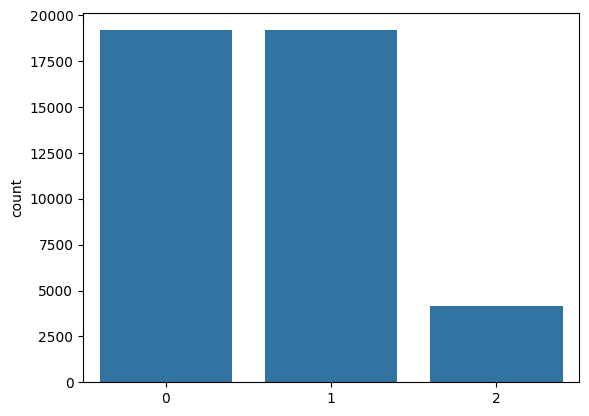

In [28]:
import seaborn as sns
sns.countplot(x=y)


In [29]:
#11. TRAIN - TEST SPLIT
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [30]:
X.shape, X_train.shape, X_test.shape

((42543, 20), (34034, 20), (8509, 20))

In [31]:
# 12. CREATING MODEL

dimension = 50
vocab_size = 10000
model = keras.Sequential([
#embedding layer
keras.layers.Embedding(vocab_size, dimension),
# LSTM layer
keras.layers.LSTM(100,return_sequences=True),
keras.layers.Dropout(0.3),  # Dropout after first LSTM
keras.layers.LSTM(50, return_sequences=True),
keras.layers.Dropout(0.3),  # Dropout after second LSTM
keras.layers.LSTM(50),
keras.layers.Dropout(0.3),  # Dropout before final dense layer
#output layer
keras.layers.Dense(3, activation = 'softmax')
])
#compilation
model.compile(optimizer = 'adam',
loss = 'sparse_categorical_crossentropy',
metrics = ['accuracy'])

In [32]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding (Embedding)           │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm (LSTM)                     │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_2 (LSTM)                   │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [33]:
# EarlyStopping + ModelCheckpoint
early_stop = EarlyStopping(
    monitor='val_loss',
    patience=3,
    restore_best_weights=True
)

model_checkpoint = ModelCheckpoint(
    filepath='/content/drive/MyDrive/Saved model/best_model.keras',    # Save The Best Model
    save_best_only=True,
    monitor='val_loss',
    mode='min'
)

In [34]:
# Train the Model
M = model.fit(
X_train, y_train,
validation_split=0.2,   # this is important for val_loss monitoring
epochs=30,
batch_size=32,
callbacks=[early_stop, model_checkpoint]
)

Epoch 1/30
851/851 ━━━━━━━━━━━━━━━━━━━━ 17s 12ms/step - accuracy: 0.7403 - loss: 0.5739 - val_accuracy: 0.9133 - val_loss: 0.2391
Epoch 2/30
851/851 ━━━━━━━━━━━━━━━━━━━━ 17s 11ms/step - accuracy: 0.9376 - loss: 0.1903 - val_accuracy: 0.9235 - val_loss: 0.2343
Epoch 3/30
851/851 ━━━━━━━━━━━━━━━━━━━━ 10s 11ms/step - accuracy: 0.9598 - loss: 0.1295 - val_accuracy: 0.9142 - val_loss: 0.2845
Epoch 4/30
851/851 ━━━━━━━━━━━━━━━━━━━━ 9s 10ms/step - accuracy: 0.9720 - loss: 0.0975 - val_accuracy: 0.9129 - val_loss: 0.3245
Epoch 5/30
851/851 ━━━━━━━━━━━━━━━━━━━━ 9s 11ms/step - accuracy: 0.9793 - loss: 0.0750 - val_accuracy: 0.9014 - val_loss: 0.4009


In [35]:
loss, accuracy = model.evaluate(X_test, y_test)
print(f'Model Accuracy : {accuracy * 100}')

266/266 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.9270 - loss: 0.2272
Model Accuracy : 92.10247993469238


In [36]:
# Preprocessing functions
def clean_text(text):
    text = text.lower()
    text = ''.join([ch if ch.isalpha() else ' ' for ch in text])
    text = ' '.join(text.split())
    return text

def lemmatize(text):
    doc = nlp(text)
    return ' '.join([token.lemma_ for token in doc])

def remove_stopwords(text):
    doc = nlp(text)
    no_stopwords_list = [word.text for word in doc if not word.is_stop]
    return ' '.join(no_stopwords_list)

def preprocess_text(text):
    text = clean_text(text)
    text = lemmatize(text)
    text = remove_stopwords(text)
    encoded = one_hot(text, vocab_size)
    padded = pad_sequences([encoded], maxlen=sentence_length, padding='pre')
    return padded

In [37]:
# Final prediction function
def predict_hate_speech(text):
    # Preprocess the input text
    processed = clean_text(text)  # Clean the text
    processed = lemmatize(processed)  # Lemmatize the text
    processed = remove_stopwords(processed)  # Remove stopwords
    # Convert to one-hot representation
    vocab_size = 10000
    one_hot_repr = one_hot(processed, vocab_size)
    # Pad the sequence
    sentence_length = 30
    padded = pad_sequences([one_hot_repr], maxlen=sentence_length, padding='pre')
    # Make prediction
    prediction = model.predict(padded)
    # Interpret the prediction
    label = np.argmax(prediction, axis=1)[0]
    label_dict = {0: "Hate Speech", 1: "Offensive", 2: "Neither"}
    return label_dict[label]

In [39]:
# Check the model
user_input = input("Enter a sentence to check for hate speech: ")
result = predict_hate_speech(user_input)
print("Prediction:", result)

Enter a sentence to check for hate speech: i like you
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
Prediction: Hate Speech


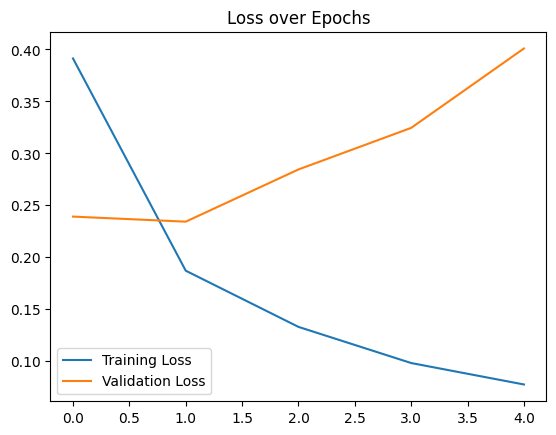

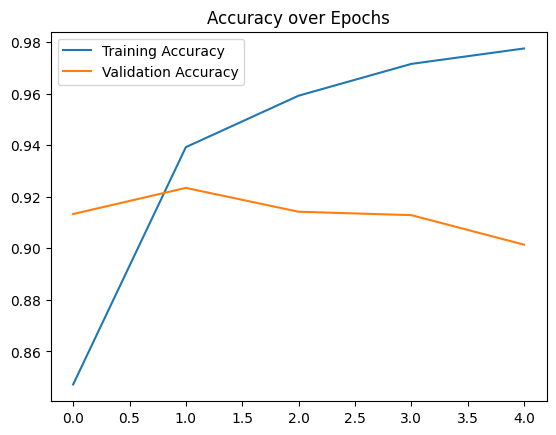

In [40]:
# Plot training vs validation loss
plt.plot(M.history['loss'], label='Training Loss')
plt.plot(M.history['val_loss'], label='Validation Loss')
plt.legend()
plt.title("Loss over Epochs")
plt.show()

# Plot training vs validation accuracy
plt.plot(M.history['accuracy'], label='Training Accuracy')
plt.plot(M.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.title("Accuracy over Epochs")
plt.show()

In [41]:
pred = np.argmax(model.predict(X_test), axis = -1)

266/266 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


In [42]:
y_test[:5]

array([1, 1, 0, 1, 2])

In [43]:
pred[:5]

array([1, 1, 0, 1, 2])

In [44]:
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.96      0.91      0.94      3812
           1       0.92      0.95      0.94      3807
           2       0.76      0.85      0.80       890

    accuracy                           0.92      8509
   macro avg       0.88      0.90      0.89      8509
weighted avg       0.92      0.92      0.92      8509



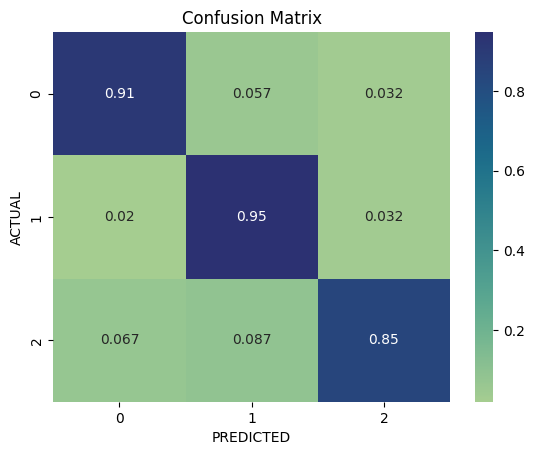

In [45]:
# Confusion Matrix
cf = confusion_matrix(y_test, pred, normalize = 'true')
sns.heatmap(cf, annot = True, cmap = 'crest')
plt.title("Confusion Matrix")
plt.xlabel('PREDICTED'),
plt.ylabel('ACTUAL');

#When Need to Clear the Mount

In [299]:
# Clear the Mount Point First
!fusermount -u /content/drive
!rm -r /content/drive
from google.colab import drive
drive.mount('/content/drive')

fusermount: failed to unmount /content/drive: No such file or directory
rm: cannot remove '/content/drive': No such file or directory
Mounted at /content/drive


# **Save the Model in Drive**

In [46]:
from google.colab import drive
drive.mount('/content/drive')  # mount once

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [47]:
# Save trining & test data to Google Drive
np.save('/content/drive/MyDrive/Saved model/X_train.npy', X_train)
np.save('/content/drive/MyDrive/Saved model/X_test.npy', X_test)
np.save('/content/drive/MyDrive/Saved model/y_train.npy', y_train)
np.save('/content/drive/MyDrive/Saved model/y_test.npy', y_test)


In [48]:
# Save training history
with open('/content/drive/MyDrive/Saved model/history.pkl', 'wb') as f:
    pickle.dump(M.history, f)

In [49]:
# Save Final Predictions
np.save('/content/drive/MyDrive/Saved model/y_test.npy', y_test)
np.save('/content/drive/MyDrive/Saved model/pred.npy', pred)

In [50]:
# Save the model
model.save('/content/drive/MyDrive/Saved model/my_model.keras')

## Before Load the Model Import all the Libraries

In [122]:
from google.colab import drive
drive.mount('/content/drive')   # mount again for load the model

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [51]:
# Load the Trained/Savd Model
from tensorflow.keras.models import load_model

model = load_model('/content/drive/MyDrive/Saved model/my_model.keras')

In [52]:
# Load the saved arrays
X_train = np.load('/content/drive/MyDrive/Saved model/X_train.npy')
X_test = np.load('/content/drive/MyDrive/Saved model/X_test.npy')
y_train = np.load('/content/drive/MyDrive/Saved model/y_train.npy')
y_test = np.load('/content/drive/MyDrive/Saved model/y_test.npy')

In [72]:
# Check the model accuracy
loss, accuracy = model.evaluate(X_test, y_test)
print(f'Model Accuracy : {accuracy * 100:.3f}%')

266/266 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.9270 - loss: 0.2272
Model Accuracy : 92.102%


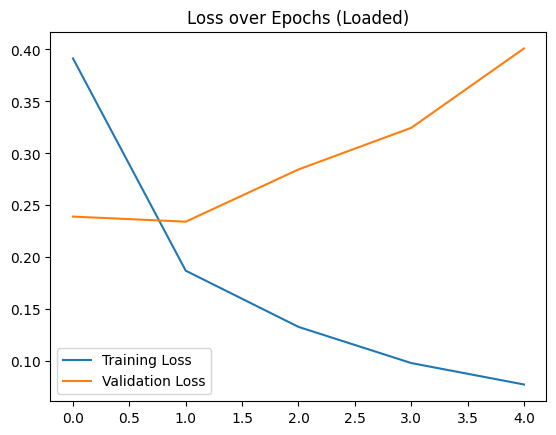

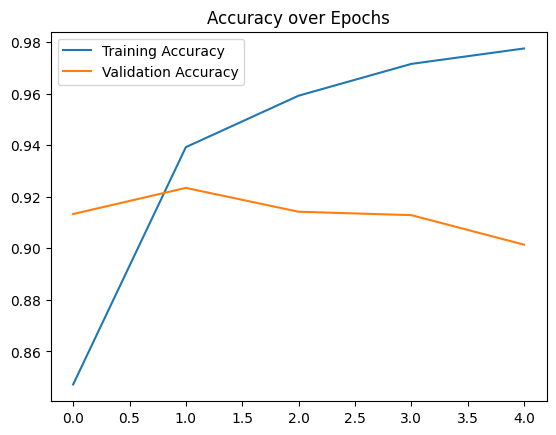

In [54]:
# Replot from loaded history
with open('/content/drive/MyDrive/Saved model/history.pkl', 'rb') as f:
    loaded_history = pickle.load(f)

# Plot training vs validation loss
plt.plot(loaded_history['loss'], label='Training Loss')
plt.plot(loaded_history['val_loss'], label='Validation Loss')
plt.legend()
plt.title("Loss over Epochs (Loaded)")
plt.show()

# Plot training vs validation accuracy
plt.plot(loaded_history['accuracy'], label='Training Accuracy')
plt.plot(loaded_history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.title("Accuracy over Epochs")
plt.show()

Text(0.5, 1.0, 'Confusion Matrix')

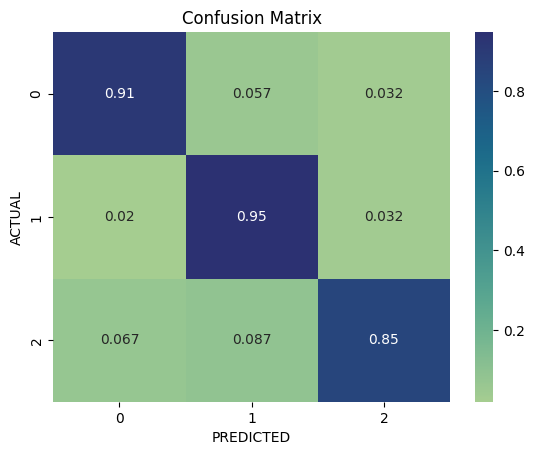

In [55]:
# Load Final Predictions
y_test = np.load('/content/drive/MyDrive/Saved model/y_test.npy')
pred = np.load('/content/drive/MyDrive/Saved model/pred.npy')

# Load Confusion Matrix
cf = confusion_matrix(y_test, pred, normalize = 'true')
sns.heatmap(cf, annot = True, cmap = 'crest')
plt.xlabel('PREDICTED'),
plt.ylabel('ACTUAL');
plt.title('Confusion Matrix')

In [65]:
model.save("/content/drive/MyDrive/Saved model/my_model.keras")

In [66]:
import gradio as gr
import re
import spacy
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing.text import one_hot
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [67]:
# Load spaCy model
nlp = spacy.load("en_core_web_sm")

# Constants
vocab_size = 10000
sentence_length = 20

# Load model from your drive or upload it
model = load_model("/content/drive/MyDrive/Saved model/my_model.keras")

In [68]:
# Preprocess function
def preprocess_text(text):
    text = re.sub(r'[^a-zA-Z]', ' ', text)
    text = re.sub(r'\s+', ' ', text)
    doc = nlp(text)
    text = ' '.join([token.lemma_ for token in doc])
    doc = nlp(text)
    text = ' '.join([token.text for token in doc if not token.is_stop])
    encoded = one_hot(text, vocab_size)
    padded = pad_sequences([encoded], maxlen=sentence_length, padding='pre')
    return padded

In [69]:
# Predict function
def predict_hate_speech(text):
    processed = preprocess_text(text)
    pred = model.predict(processed)
    label = np.argmax(pred)
    label_dict = {0: "Hate Speech", 1: "Offensive", 2: "Neither"}
    return label_dict.get(label, "Unknown")

In [70]:
# Gradio interface
interface = gr.Interface(
    fn=predict_hate_speech,
    inputs=gr.Textbox(lines=3, placeholder="Enter a sentence..."),
    outputs=gr.Label(),
    title="🛡️ Hate Speech Detection",
    description="Detect whether text is Hate Speech, Offensive or Neither."
)

In [71]:
interface.launch(share=True)

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
* Running on public URL: https://df9e9233a8dd3623bf.gradio.live

This share link expires in 1 week. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)


In [64]:
# !python -m spacy download en_core_web_sm    ### For the first time